# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Sam

Last Name: Tsoi

Student ID: 913032178

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


<span style='color:red'>Grade:20/20</span>

Notes:

In [1]:
import pandas as pd
import numpy as np
import os

def cleanUp(path):
    
    """
    description: puts and cleans up all data in excel files into one data frame given a path
    
        input: a path, absolute or relative
        
        output: a pandas data frame of data in all excel files
    """
    
    
    fruitfiles = os.listdir(path)

    #find each file that ends with xlsx, knowing that it is an excel doc
    files_xlsx = [f for f in fruitfiles if f[-4:] == 'xlsx']

    fruit_list = []
    
    #cleans up each file
    for f in files_xlsx:
        
        #read excel file
        fruit = pd.read_excel(path + f, header=0)
        
        #convert it to DataFrame
        df = pd.DataFrame(fruit)

        #initial cleaning, with NaNs
        df.replace('', np.nan, regex=True, inplace=True)
        df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
        df.dropna(axis=0, how='all', inplace=True) 
        df.dropna(axis=1, how='all', inplace=True) 

        #change column names
        colnames = ['type','food','form', 'price_per_lb', 'yield', 'lb_per_cup','price_per_cup']
        df.columns = colnames

        
        df = df[pd.notnull(df['price_per_cup'])] #gets rid of bottom rows that is not part of data. 
        df = df[2:] #gets rid of top rows

         #form: type
        df['form'] = df ['type']

        #lb_per_cup: yield
        df['lb_per_cup'] = df ['yield']

        #yield: price_per_lb
        df['yield'] = df['price_per_lb']

        #price_per_lb: food
        df['price_per_lb'] = df['food']

        #type is path name after the panultimate /
        df['type'] = path.split('/')[-2]
        #food is the file name without ".xlsx"
        df['food' ] = f[:-5]

        #concat to one data frame
        fruit_list.append(df)
        fruit_df = pd.concat(fruit_list, ignore_index=True)
        
    fruit_df[['price_per_lb', 'yield', 'lb_per_cup','price_per_cup']] = fruit_df[['price_per_lb', 'yield', 'lb_per_cup','price_per_cup']].apply(pd.to_numeric)
    return fruit_df
    
path = "/Users/samanthatsoi/sta141b-hw3-samanthatsoi/assignment3_data/fruit/"
fruitTable = cleanUp(path)

#extracting rows only with "Fresh1"
fruitTable.loc[fruitTable['form'] == "Fresh1"]


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,cherries,Fresh1,3.592990,0.92,0.341717,1.334548
2,fruit,tangerines,Fresh1,1.377962,0.74,0.407855,0.759471
3,fruit,oranges,Fresh1,1.035173,0.73,0.407855,0.578357
9,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
13,fruit,papaya,Fresh1,1.298012,0.62,0.308647,0.646174
15,fruit,raspberries,Fresh1,6.975811,0.96,0.319670,2.322874
17,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
23,fruit,peaches,Fresh1,1.591187,0.96,0.341717,0.566390
27,fruit,plums,Fresh1,1.827416,0.94,0.363763,0.707176
30,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.393800


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

<span style='color:red'>Grade:20/20</span>

Notes:

In [5]:
#vegetable Excel files
pathVeg = "/Users/samanthatsoi/sta141b-hw3-samanthatsoi/assignment3_data/vegetables/" 
vegeTable = cleanUp(pathVeg)

#extract the "Fresh" row(s) from the vegetable Excel files
vegeTable.loc[vegeTable['form'] == "Fresh1"]


#vegeTable.loc[vegeTable['food'] == "tomatoes"]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
87,vegetables,asparagus,Fresh1,3.213494,0.493835,0.396832,2.582272
88,vegetables,asparagus,Canned2,2.580297,0.650000,0.396832,1.575299
89,vegetables,asparagus,Frozen3,5.857320,1.033527,0.396832,2.248971


My code produces the correct prices for tomatoes, only because I made sure to check for values that are NaNs and deleting rows that contain NaNs in the cleanUp() function. So, it only displays the 4 rows that have values for the tomatoes file. (You can check how it looks like by uncommenting the tomatoes line.) There are other files that have the same problems, such as fruit_cocktail in the fruit directory. However, when I made the cleanUp() function, I took this into account.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

<span style='color:red'>Grade:20/20</span>

Notes:

In [103]:
#rows without a price is already taken into account

#combine the fruit and vegetable data frames
combo = vegeTable.append(fruitTable)
combo


#combo.dtypes

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,turnip_greens,Fresh1,2.471749,0.750000,0.319670,1.053526
1,vegetables,turnip_greens,Canned2,0.965254,0.650000,0.352740,0.523820
2,vegetables,turnip_greens,Frozen3,1.473043,0.776027,0.352740,0.669565
3,vegetables,artichoke,Fresh1,2.213050,0.375309,0.385809,2.274967
4,vegetables,artichoke,Canned2,3.385610,0.650000,0.385809,2.009537
5,vegetables,artichoke,Frozen3,6.221418,0.940639,0.385809,2.551754
6,vegetables,navy_beans,Canned1,0.970423,0.650000,0.385809,0.575997
7,vegetables,navy_beans,Dried2,1.505780,2.398629,0.385809,0.242198
8,vegetables,green_peas,Canned1,1.013069,0.650000,0.352740,0.549769
9,vegetables,green_peas,Frozen2,1.645573,0.892431,0.352740,0.650424


combo displays a data frame with both fruit and vegetables. Rows without price is already taken account when cleaning up the data in the cleanUp() function. Similarly, all columns are assigned the appropriate type in the cleanUp() function as well.

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

<span style='color:red'>Grade:20/20</span>

Notes:

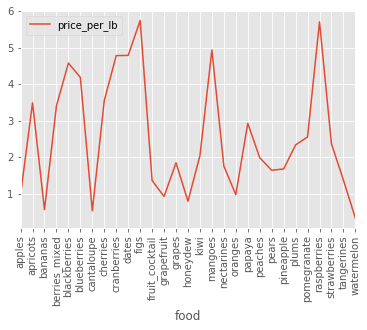

,food,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,0.977624,0.9750,4.195660,0.409280
1,apricots,3.493394,0.8950,0.372030,1.060017
2,bananas,0.566983,0.6400,0.330693,0.292965
3,berries_mixed,3.410215,1.0000,0.330693,1.127735
4,blackberries,4.581605,0.9800,0.325182,1.521737
5,blueberries,4.188936,0.9750,0.325182,1.398988
6,cantaloupe,0.535874,0.5100,0.374786,0.393800
7,cherries,3.555867,0.7850,0.391321,1.860736
8,cranberries,4.786741,1.0000,0.123163,0.589551
9,dates,4.791351,1.0000,0.165347,0.792234


In [69]:

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


avgFruit = fruitTable.groupby(['food']).mean()
avgFruit.plot(y = 'price_per_lb')

avgFruit.index.name = 'food'
avgFruit.reset_index(inplace=True)

plt.xticks(avgFruit.index, avgFruit['food'], rotation=90)
plt.show()
#avgFruit.dtypes
avgFruit



For fruits, figs are most expensive per pound, at $5.75 per pound. The runner-up, which is very close, are raspberries, at $5.71 per pound. Watermelons are least expensive per pound, at $0.33 per pound. The second least expensive are canteloupes at $0.54.

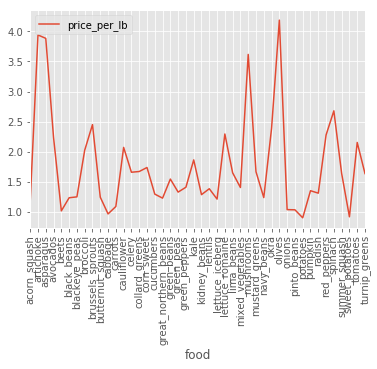

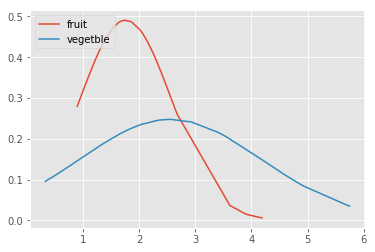

In [99]:
import scipy.stats as stats
#avgFruit.plot(layout=(4,1),subplots=True)
avgVege = vegeTable.groupby(['food']).mean()
avgVege.plot(y = 'price_per_lb')
avgVege.index.name = 'food'
avgVege.reset_index(inplace=True)
plt.xticks(avgVege.index, avgVege['food'], rotation=90)
plt.show()
avgVege

sortprice = avgVege['price_per_lb'].sort_values()
fit = stats.norm.pdf(sortprice, np.mean(avgVege['price_per_lb']), np.std(avgVege['price_per_lb']))
plt.plot(sortprice,fit, label = "fruit")

#plt.hist(avgVege['price_per_lb'],normed=True)      #use this to draw histogram of your data

sortpriceFruit = avgFruit['price_per_lb'].sort_values()
fitFruit = stats.norm.pdf(sortpriceFruit, np.mean(avgFruit['price_per_lb']), np.std(avgFruit['price_per_lb']))
plt.plot(sortpriceFruit,fitFruit, label = "vegetable")

plt.legend(loc="upper left")
plt.show() 
#x = np.random.normal(size=100)
#avgVege.distplot(x);


The distributions for fruit and vegetables are displayed above. As shown above, the distribution for fruit is skewed right while the distibution for vegetables is more normal than fruit. Therefore, this means that the mean/average for fruit is less than the median. There are more values for fruits that are around 1.8, and there are more values for vegetables that are around 2.7. The distribution for vegetables is still skewed right a little bit.  For vegetables, olives are most expensive per pound, at $4.19 per pound. The runner-up, which is very close, are artichokes, at $3.94 per pound. Potatoes are least expensive per pound, at $0.90 per pound. The second least expensive are sweet potatoes at $0.92. 

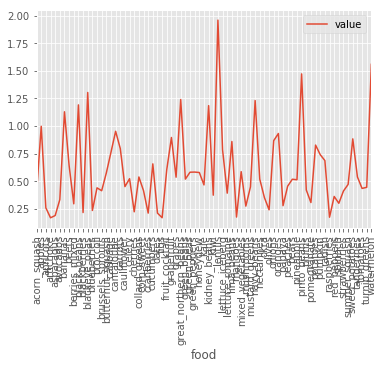

In [143]:
avgCombo = combo.groupby(['food']).mean()
avgCombo['value'] = avgCombo['yield'] / avgCombo['price_per_lb']


avgCombo.plot(y = 'value')
avgCombo.index.name = 'food'
avgCombo.reset_index(inplace=True)
plt.xticks(avgCombo.index, avgCombo['food'], rotation=90)
plt.show()


The food with the highest value is lentils, at the value of 1.96. I added a column named "value" into the data frame. I calculated the best value by dividing yield and price per pound, because this would show how much each price per pound would yield.  The second highest value after lentils is watermelon, at a value of 1.56. How much value varies can be seen in the graph above. The food with the lowest value is artichoke and figs, at the value of .17.

In [126]:
np.median(avgFruit['price_per_lb']), np.median(avgVege['price_per_lb']), np.std(avgFruit['price_per_lb']), np.std(avgVege['price_per_lb'])

(2.0446834079658482,
 1.4778823671470955,
 1.6107448368034074,
 0.8124729835295104)

Something I found very surprising about this data is that the more expensive a food is per pound, the more of a delicacy a food is. For example, figs, dates, and artichokes aren't vegetables that most of us eat everyday. 
I also thought it was really interesting that the least expensive vegetables are the starchy ones, such as potatoes and sweet potatoes. We use the least expensive foods way more in our every day lives -- we don't talk about eating dates and figs that often. Additionally, I found it very surprising that fruits are generally more expensive than vegetables, with the medians at 2.04 and 1.48, even though the distribution for fruit is more skewed right than that of vegetables. However, it is important to note that the the distribution for fruit varies more, with the standard deviation at 1.61 and that of vegetable is at .81, almost half of that of fruits.

In [150]:
avgCombo = avgCombo.sort_values(by='value', ascending=False)

avgCombo.head()

,food,price_per_lb,yield,lb_per_cup,price_per_cup,value
food,,,,,,
39,lentils,1.385036,2.716095,0.385809,0.196738,1.961029
72,watermelon,0.333412,0.520000,0.330693,0.212033,1.559632
57,pinto_beans,1.034999,1.524315,0.385809,0.353878,1.472770
11,blackeye_peas,1.250171,1.630137,0.380297,0.379974,1.303931
31,great_northern_beans,1.228972,1.524315,0.385809,0.397567,1.240317


In order to see which food gives the best combo, I think that it is best to examine the value of each food. As mentioned before, the value is a column that I added that displays the yield per price per pound. This gives an insight on how much a food yields for a certain price that is leveled out for the same weight. This means that lentils gives the best yield for the price, but this does not necessarily mean that this has the best combination of nutrition, yield, and price. Therefore, since we do not have numeric values for nutrition at the time, I think it is best to compare the top foods that have the best combination in yield and price, and then manually determine which has the best combination for all three nutrtion, yield, and price. We see that the best 5 foods for best combination in yield and price are lentils, watermelons, pinto beans, blackeye peas, and great northern beans. Although subjective, lentils isn't necessarily the highest in nutrition. It is high in fiber which can help in weight loss, but it is not particularly high in vitamins. Watermelon is high in Vitamin A and Vitamin C, which is something good to consider. The two beans are low in fat and provide great protein. According to Google, black-eyed peas are very very high in fiber, vitamin K, vitamin A, and potassium. I would say that black-eyed peas might beat out the other ones in terms of the best combination. It is important to keep in mind that this is all very subjective without a numeric value to determine nutrition for each of these foods.